In [75]:
pos_tag_map = {
    "ABL": "Ablative",
    "ABN": "Adverb",
    "ABX": "Adverb (unspecified)",
    "AP": "Adjective",
    "APg": "Adjective (generic)",
    "AT": "Article",
    "BE": "Verb (to be)",
    "BED": "Past participle of 'to be'",
    "BEDZ": "Third person singular past tense of 'to be'",
    "BEG": "Gerund of 'to be'",
    "BEM": "Present participle of 'to be'",
    "BEN": "Noun (gerund)",
    "BER": "Present participle of 'to be'",
    "BEZ": "Third person singular present tense of 'to be'",
    "CC": "Coordinating conjunction",
    "CD": "Cardinal number",
    "CDg": "Cardinal number (generic)",
    "CS": "Subordinating conjunction",
    "DO": "Auxiliary verb 'do'",
    "DOD": "Past participle of 'to do'",
    "DOZ": "Third person singular present tense of 'to do'",
    "DT": "Determiner",
    "DTI": "Determiner (indefinite)",
    "DTS": "Determiner (specific)",
    "DTX": "Determiner (unknown)",
    "DTg": "Determiner (generic)",
    "EX": "Existential 'there'",
    "HV": "Auxiliary verb 'have'",
    "HVD": "Past participle of 'to have'",
    "HVG": "Gerund of 'to have'",
    "HVN": "Noun (gerund)",
    "HVZ": "Third person singular present tense of 'to have'",
    "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective",
    "JJR": "Comparative adjective",
    "JJS": "Superlative adjective",
    "JJT": "Adjective (temporal)",
    "JJg": "Adjective (generic)",
    "MD": "Modal verb",
    "NEG": "Negation",
    "NIL": "Null",
    "NN": "Noun (singular)",
    "NNS": "Noun (plural)",
    "NNSg": "Noun (plural generic)",
    "NNg": "Noun (singular generic)",
    "NP": "Proper noun (singular)",
    "NPS": "Proper noun (plural)",
    "NPSg": "Proper noun (plural generic)",
    "NPg": "Proper noun (singular generic)",
    "NR": "Noun (reduced)",
    "NRS": "Noun (reduced plural)",
    "NRg": "Noun (reduced generic)",
    "OD": "Ordinal number",
    "PN": "Pronoun",
    "PNg": "Pronoun (generic)",
    "PPL": "Participle",
    "PPLS": "Participle (plural)",
    "PPO": "Personal pronoun (objective)",
    "PPS": "Personal pronoun (subjective)",
    "PPSS": "Personal pronoun (subjective singular)",
    "PPg": "Personal pronoun (generic)",
    "PPgg": "Personal pronoun (generic plural)",
    "QL": "Quantifier",
    "QLP": "Quantifier (postdeterminer)",
    "RB": "Adverb",
    "RBR": "Comparative adverb",
    "RBT": "Temporal adverb",
    "RBg": "Adverb (generic)",
    "RN": "Adverb (reduced)",
    "RP": "Particle",
    "TO": "Infinitive marker",
    "UH": "Interjection",
    "VB": "Verb (base form)",
    "VBD": "Past tense verb",
    "VBG": "Gerund",
    "VBN": "Past participle",
    "VBZ": "Third person singular present tense verb",
    "WDT": "Wh-determiner",
    "WPO": "Wh-pronoun (objective)",
    "WPS": "Wh-pronoun (subjective)",
    "WPg": "Wh-pronoun (generic)",
    "WQL": "Wh-quantifier",
    "WRB": "Wh-adverb",
    "pct": "Percentage"
}
tag_dict = {
    key : 0 for key in pos_tag_map.keys()
}
pos_tag_we_keys = list(pos_tag_map.keys());pos_tag_we_keys.append('<E>')
tag_dict_we = {
    key : 0 for key in pos_tag_we_keys
}
itos = {i+1:v for i,v in enumerate(pos_tag_map.keys())}
itos[0] = '<S>'
itos[len(tag_dict)+1] = '<E>'
stoi = {v:k for k,v in itos.items()}

# stoi

In [76]:
import xml.etree.ElementTree as ET
import numpy as np
import random
import copy
import math

sample_file = ET.parse('brown_tei/Corpus.xml')
root = sample_file.getroot()
tei = root.findall('{http://www.tei-c.org/ns/1.0}TEI')
total_words = 0
states = set({})
sentences = []
words_map = {'<S>':0,'<E>':1}
for t in tei:
    text = t.find('{http://www.tei-c.org/ns/1.0}text')
    body = text.find('{http://www.tei-c.org/ns/1.0}body')
    for paras in body:
        for sentence in paras:
            if sentence.find('{http://www.tei-c.org/ns/1.0}mw') != None:
                continue
            tags_in_sentence = ['<S>']
            words_in_sentence = ['<S>']
            for word in sentence:
                total_words += 1
                words_map[word.text] = len(words_map)
                states.add(word.attrib["type"])
                tags_in_sentence.append(word.attrib["type"])
                words_in_sentence.append(word.text)
                # words[word][word.attrib["type"]] += 1
                # print(f'{word.text} --> {pos_tag_map[word.attrib["type"]]}')
            tags_in_sentence.append('<E>')
            words_in_sentence.append('<E>')
            sentences.append({"tags":tags_in_sentence,"words":words_in_sentence})
random.shuffle(sentences)
tr = math.ceil(0.8*len(sentences))
tr_sentences = sentences[:tr]
tst_sentences = sentences[tr:]
unique_words = len(words_map) + 2

print("---- data processed summary ----")
print(f'total samples : {len(tei)}')
print(f'total words   : {total_words}')
print(f'total distinc words   : {len(words_map)}')
print(f'total tags    : {len(states)}')
print(f'total valid sentences : {len(sentences)}')
print(f'training sentence set : {len(tr_sentences)}')
print(f'testing sentence set  : {len(tst_sentences)}')

---- data processed summary ----
total samples : 500
total words   : 1081150
total distinc words   : 54496
total tags    : 84
total valid sentences : 52686
training sentence set : 42149
testing sentence set  : 10537


<ipython-input-77-6c8b062415c9>:45: RuntimeWarning: invalid value encountered in divide
  transition_arr[i] = transition_arr[i]/ transition_arr[i].sum()


dimensionss of emission count : 49114 84.0
dimensionss of transition count : 85 (84 tags + <S>) 85.0 (84 tags + <E>)
dimensionss of emission count (eff) : 54498 84
dimensionss of transition count (eff) : 85 85


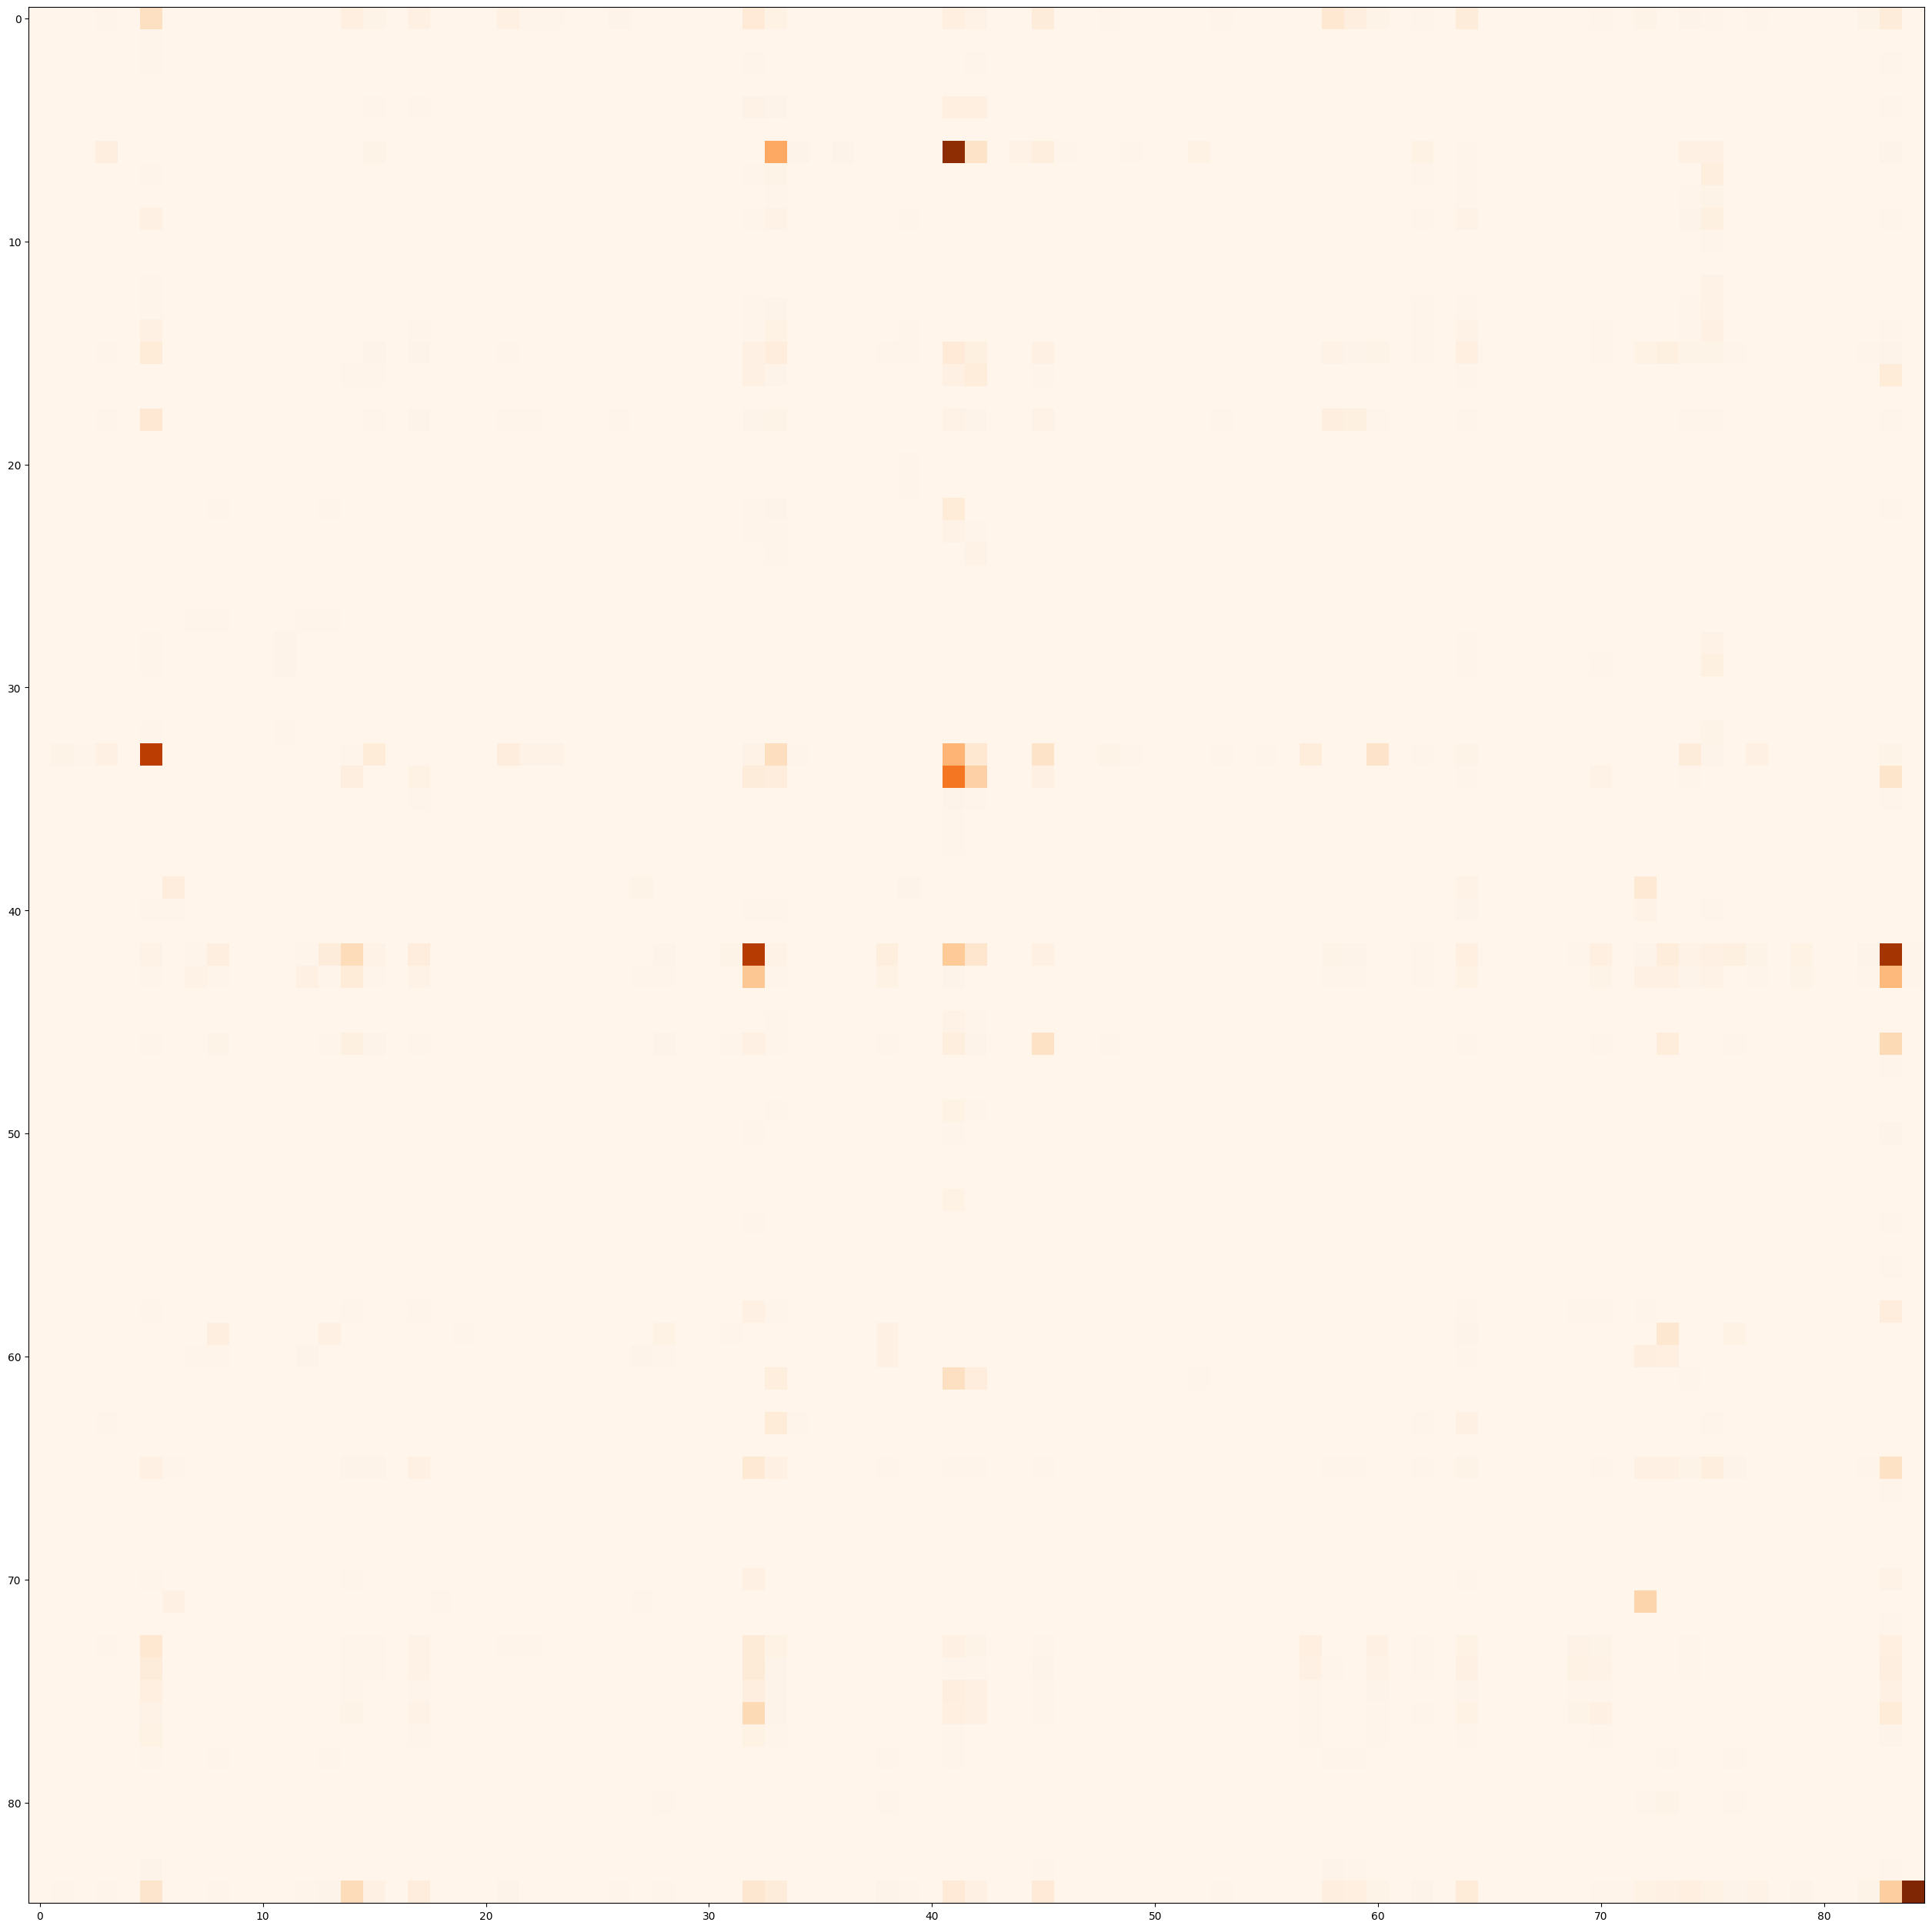

In [77]:
# Find the transition and emission matrix

import matplotlib.pyplot as plt
%matplotlib inline

emission_count = {'<S>':copy.deepcopy(tag_dict),'<E>':copy.deepcopy(tag_dict)}
transition_count = {'<S>':copy.deepcopy(tag_dict_we)}
emission_arr = np.zeros((unique_words,len(states)))
transition_arr = np.zeros((len(states) +1,len(states) + 1))
for key in pos_tag_map.keys():
    transition_count[key] = copy.deepcopy(tag_dict_we)
for sentence in tr_sentences:
    context = '<S>'
    for i in range(1,len(sentence["words"])):
        w = sentence["words"][i]
        t = sentence["tags"][i]
        if t not in stoi:
            print(f'debug tag -> {t}')
        transition_count[context][t] += 1
        # print(f'{context} {t} {transition_count[context][t]}')
        context = t
        if w=='<E>':
            continue
        if w not in emission_count:
            emission_count[w] = copy.deepcopy(tag_dict)
        emission_count[w][t] += 1
for w in emission_count:
    for c in emission_count[w]:
        i = words_map[w]
        emission_arr[i][stoi[c]-1] = emission_count[w][c]
for i,s in enumerate(transition_count):
    for c in transition_count[s]:
        transition_arr[i][stoi[c]-1] = transition_count[s][c]


total_unknown_words = 0
for i,rows in enumerate(emission_arr):
    if emission_arr[i].sum()<1:
        # print(f'debug emission_sum -> {emission_arr[i].sum()} i -> {i}')
        total_unknown_words+=1
        continue
    emission_arr[i] = emission_arr[i]/ emission_arr[i].sum()
# print(f'total_unknown_words {total_unknown_words}')
for i,rows in enumerate(transition_arr):
    transition_arr[i] = transition_arr[i]/ transition_arr[i].sum()

# coded up an inefficent way of finding the dimmensions

avg_emm_val = 0
for k,v in emission_count.items():
    avg_emm_val += len(v)
avg_emm_val /= len(emission_count)
avg_trans_val = 0
for k,v in transition_count.items():
    avg_trans_val += len(v)
avg_trans_val /= len(transition_count)
print(f'dimensionss of emission count : {len(emission_count)} {avg_emm_val}')
print(f'dimensionss of transition count : {len(transition_count)} (84 tags + <S>) {avg_trans_val} (84 tags + <E>)')

# effiencent way
print(f'dimensionss of emission count (eff) : {len(emission_arr)} {len(emission_arr[0])}')
print(f'dimensionss of transition count (eff) : {len(transition_arr)} {len(transition_arr[0])}')

emission_arr[49086].sum()

# VISUALIZATION

trans_cnt_arr = [[transition_count[tag][v] for v in transition_count[tag]] for tag in transition_count]
plt.figure(figsize=(32,32)) # :) if you want to look at larger image maybe put (16,16) or (32,32)
plt.imshow(trans_cnt_arr,cmap='Oranges')
arr_tags = ['S'];arr_tags.extend([key for key in pos_tag_map.keys()]);arr_tags.append('<E>')

# Not sure what i wanted to do :P (it's modified version of visuzation code) ⚠️

# for r in trans_cnt_arr:
#     print(r)
# plt.figure(figsize=(16,16))
# plt.imshow(trans_cnt_arr,cmap='Oranges')
# arr_tags = ['S'];arr_tags.extend([key for key in pos_tag_map.keys()]);arr_tags.append('<E>')
# for i in arr_tags[:-1]:
#     for j in arr_tags[1:]:
#         chstr = i+j
#         plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
#         plt.text(j,i,transition_count[i][j],ha="center",va="top",color="gray")
# plt.show()

In [78]:
# (Failure) i converted the hashmap to array, thinking it will be easy to manupulate array  ⚠️
# I am facing indexing issue (i did verify it above with the emission count len)  ⚠️

# def viterbi(sentence,emission_arr,transition_arr,states):
#     pstates = ['<S>']
#     for i in range(1,len(sentence["words"])):
#         w = sentence["words"][i]
#         temp_p = []
#         for state in states:
#             if w=='<S>':
#               trans_p = 1
#             else:
#               trans_p = transition_arr[stoi[pstates[-1]]-1][stoi[state]-1]
#             i = words_map[w]
#             emit_p = emission_arr[i][stoi[state]-1]
#             state_p = trans_p * emit_p
#             temp_p.append(state_p)
#         pmax = max(temp_p)
#         state_max = states[temp_p.index(pmax)]
#         pstates.append(state_max)
#     return pstates

In [85]:
from operator import indexOf
def viterbi(sentence,emission_count,transition_count,states):
    pstates = ['<S>']
    for i in range(1,len(sentence["words"])):
        w = sentence["words"][i]
        temp_p = []
        for state in states:
          trans_p = transition_count[pstates[-1]][state]
          i = words_map[w]
          emit_p = emission_count[w][state] if w in emission_count else 1 # on the go data smoothing :)
          state_p = trans_p * emit_p
          temp_p.append((state_p,state))
        pmax = max(temp_p,key = lambda x:x[0])
        state_max = pmax[1]
        pstates.append(state_max)
    return pstates

# FOR CHECKING AND TESTING

# ans = viterbi(tst_sentences[0],emission_count,transition_count,list(states))
# print(list(zip(ans,tst_sentences[0]["words"])))
# print(list(zip(tst_sentences[0]["tags"],tst_sentences[0]["words"])))

def accuracy(tst_sentences,emission_count,transition_count,states):
    corr_emi = 0
    correct_sentences = 0
    correct = 0
    total = 0
    for j,sentence in enumerate(tst_sentences):
        ans = viterbi(sentence,emission_count,transition_count,list(states))
        for i in range(1,len(sentence["words"])-1):
            if ans[i] == sentence["tags"][i]:
                correct += 1
            key_value = list(emission_count[sentence["words"][i]].items()) if sentence["words"][i] in emission_count else -1
            if key_value != -1:
              pred_key_index = key_value.index(max(key_value,key = lambda x:x[1]))
              (state,count) = key_value[pred_key_index]
              # print(state,count)
              if state==sentence["tags"][i]:
                  corr_emi += 1
            total += 1
        if "".join(ans[1:-1]) == "".join(sentence["tags"][1:-1]):
            correct_sentences += 1
    t_acc = correct/total*100
    s_acc = correct_sentences/len(tst_sentences)*100
    te_acc = corr_emi/total*100
    return (t_acc,s_acc,te_acc)

(t_acc,s_acc,te_acc) = accuracy(tst_sentences,emission_count,transition_count,states)
print(f'token level acc : {t_acc}% \nsentence level acc :  {s_acc}%\ntoken level acc (based only on emission):{te_acc}')

token level acc : 90.74187671517193% 
sentence level acc :  28.09148714055234%
token level acc (based only on emission):90.88670064340567
